# PyCaret tutorial (Classification)

This an exploratory example of using PyCaret for a classification problem.

## Loading data

* PyCaret has some built-in datasets. 
* To use your dataset you need to load it using Pandas or any other method but at the end you need to convert it to a pandas-like format.
* In this example we are going to load data that way.

In [1]:
import pandas as pd
from pycaret.classification import ClassificationExperiment
from pycaret.classification import *

In [2]:
df = pd.read_csv("/home/amaldonado/Code/pycaret-tutorial/datasets/breast_cancer/wdbc.data", sep=',', header=None)
columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
df.columns = columns
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Setting up experiment

* It initialize the training environment. It should be called before any other Pycaret function.
* We should set at least data and target. The rest is optional.
* This function can take parameters for tuning all the preparation and training process.

In [3]:
exp = ClassificationExperiment()
exp.setup(data=df, target="diagnosis", session_id=1) # we'll use the default configuration

,Description,Value
0,Session id,1
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 32)"
5,Transformed data shape,"(569, 32)"
6,Transformed train set shape,"(398, 32)"
7,Transformed test set shape,"(171, 32)"
8,Numeric features,31
9,Preprocess,True


* We can get any element of the experiment using `get_config`. 
* Check the documentation to see a list of the available options.

In [4]:
transformed_data = exp.get_config("X_train_transformed")
transformed_data

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,8810987.0,13.860000,16.930000,90.959999,578.900024,0.10260,0.15170,0.099010,0.056020,0.2106,...,15.750000,26.930000,104.400002,750.099976,0.14600,0.43700,0.463600,0.16540,0.3630,0.10590
338,897880.0,10.050000,17.530001,64.410004,310.799988,0.10070,0.07326,0.025110,0.017750,0.1890,...,11.160000,26.840000,71.980003,384.000000,0.14020,0.14020,0.105500,0.06499,0.2894,0.07664
218,8811842.0,19.799999,21.559999,129.699997,1230.000000,0.09383,0.13060,0.127200,0.086910,0.2094,...,25.730000,28.639999,170.300003,2009.000000,0.13530,0.32350,0.361700,0.18200,0.3070,0.08255
287,8913.0,12.890000,13.120000,81.889999,515.900024,0.06955,0.03729,0.022600,0.011710,0.1337,...,13.620000,15.540000,87.400002,577.000000,0.09616,0.11470,0.118600,0.05366,0.2309,0.06915
458,9112594.0,13.000000,25.129999,82.610001,520.200012,0.08369,0.05073,0.012060,0.017620,0.1667,...,14.340000,31.879999,91.059998,628.500000,0.12180,0.10930,0.044620,0.05921,0.2306,0.06291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,901034302.0,12.540000,18.070000,79.419998,491.899994,0.07436,0.02650,0.001194,0.005449,0.1528,...,13.720000,20.980000,86.820000,585.700012,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
301,892604.0,12.460000,19.889999,80.430000,471.299988,0.08451,0.10140,0.068300,0.030990,0.1781,...,13.460000,23.070000,88.129997,551.299988,0.10500,0.21580,0.190400,0.07625,0.2685,0.07764
406,905189.0,16.139999,14.860000,104.300003,800.000000,0.09495,0.08501,0.055000,0.045280,0.1735,...,17.709999,19.580000,115.900002,947.900024,0.12060,0.17220,0.231000,0.11290,0.2778,0.07012
433,908445.0,18.820000,21.969999,123.699997,1110.000000,0.10180,0.13890,0.159400,0.087440,0.1943,...,22.660000,30.930000,145.300003,1603.000000,0.13900,0.34630,0.391200,0.17080,0.3007,0.08314


## Running the experiment

* We can use the `compare_models` function to performed an automatic model evaluation. 
* We can print the list of available models with `Experiment.models()`.
* We can include or exclude certain models from the evaluation.

In [4]:
exp.models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [5]:
best_model = exp.compare_models(exclude=['lightgbm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9799,0.9932,0.9799,0.9813,0.9797,0.9563,0.9582,0.0240
xgboost,Extreme Gradient Boosting,0.9749,0.9967,0.9749,0.9754,0.9749,0.9463,0.9468,0.0150
lda,Linear Discriminant Analysis,0.9723,0.9924,0.9723,0.9744,0.9718,0.9388,0.9420,0.0060
rf,Random Forest Classifier,0.9698,0.9919,0.9698,0.9705,0.9696,0.9347,0.9357,0.0290
ridge,Ridge Classifier,0.9674,0.0000,0.9674,0.9697,0.9668,0.9283,0.9317,0.0060
ada,Ada Boost Classifier,0.9674,0.9936,0.9674,0.9686,0.9671,0.9293,0.9311,0.0200
lightgbm,Light Gradient Boosting Machine,0.9624,0.9949,0.9624,0.9640,0.9622,0.9190,0.9211,81.2160
qda,Quadratic Discriminant Analysis,0.9600,0.9877,0.9600,0.9626,0.9601,0.9156,0.9179,0.0060
gbc,Gradient Boosting Classifier,0.9599,0.9902,0.9599,0.9609,0.9595,0.9129,0.9147,0.0370
dt,Decision Tree Classifier,0.9197,0.9166,0.9197,0.9228,0.9198,0.8294,0.8321,0.0060


## Analyze model

* We can get some interesting plots using PyCaret using `plot_model`.
* Check documentation for a list of available plots.
* We can check the model full pipeline and parameters using `evaluate_model`. IMPORTANT: Some options may required more time to get calculated.

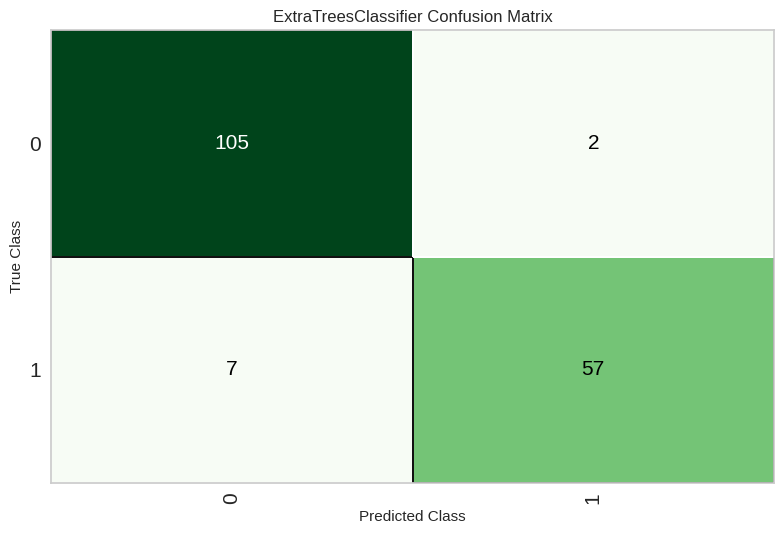

In [13]:
exp.plot_model(best_model, plot="confusion_matrix")

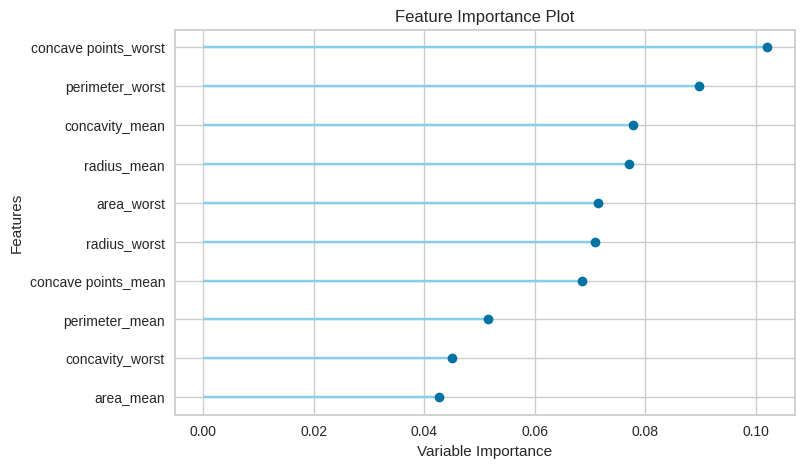

In [15]:
exp.plot_model(best_model, plot = 'feature')

In [17]:
exp.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Inference

* One we have the trained model, we can save it and load it to use for predictions in others scripts.

In [19]:
# Save model
exp.save_model(best_model, "bc_model_v1")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              's...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, ma

In [20]:
# Load model
loaded_model = load_model("bc_model_v1")

Transformation Pipeline and Model Successfully Loaded


In [21]:
loaded_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['id', 'radius_mean',
                                             'texture_mean', 'perimeter_mean',
                                             'area_mean', 'smoothness_mean',
                                             'compactness_mean',
                                             'concavity_mean',
                                             'concave points_mean',
                                             's...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=1,
                                      verbose=0, warm_start=False))],
         verbose=False)

In [22]:
# Use the model in some dataset
predictions = predict_model(loaded_model, data=df)

In [23]:
predictions

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
0,842302,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,...,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M,M,1.00
1,842517,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,...,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M,M,1.00
2,84300903,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,...,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M,M,1.00
3,84348301,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,...,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M,M,1.00
4,84358402,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,...,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M,M,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,...,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M,M,1.00
565,926682,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,...,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M,M,0.99
566,926954,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,...,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M,M,1.00
567,927241,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,0.2397,...,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M,M,1.00
